In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
image_size = (28, 28)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/",
    image_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale",
    validation_split=0.2,
    subset="training",
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/",
    image_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale",
    validation_split=0.2,
    subset="validation",
    seed=123
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 528 files belonging to 36 classes.
Using 423 files for training.


2025-06-11 17:36:56.410096: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 528 files belonging to 36 classes.
Using 105 files for validation.
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [5]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (x / 255.0, y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (x / 255.0, y)).cache().prefetch(buffer_size=AUTOTUNE)


In [6]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0526 - loss: 3.4172 - val_accuracy: 0.3238 - val_loss: 2.8575
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3857 - loss: 2.6000 - val_accuracy: 0.5048 - val_loss: 1.9850
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5766 - loss: 1.7266 - val_accuracy: 0.7048 - val_loss: 1.1208
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7499 - loss: 0.9621 - val_accuracy: 0.8571 - val_loss: 0.6130
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8563 - loss: 0.5718 - val_accuracy: 0.8952 - val_loss: 0.4769
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8599 - loss: 0.4238 - val_accuracy: 0.8952 - val_loss: 0.4080
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9123 - loss: 0.2437 - val_accuracy: 0.8952 - val_loss: 0.3264
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9450 - loss: 0.1881 - val_accuracy: 0.8762 - v

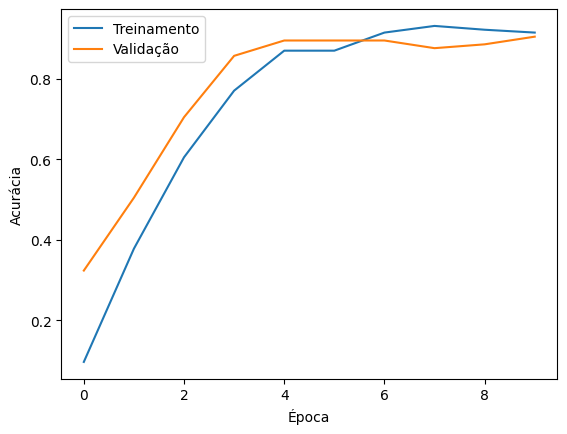

In [8]:
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


2025-06-11 17:43:44.053995: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


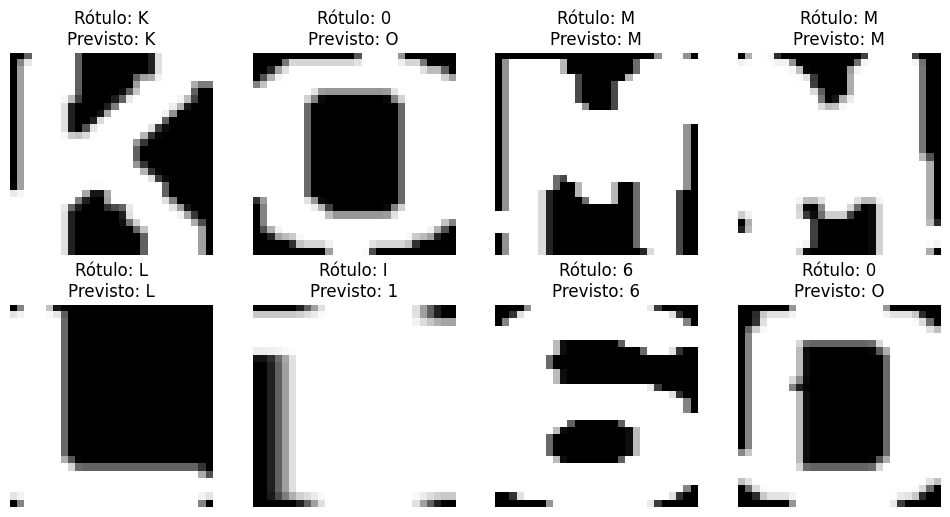

In [9]:
# Obter um batch de imagens da validação
for images, labels in val_ds.take(1):  # pega um batch qualquer
    predictions = model.predict(images)
    predicted_labels = tf.argmax(predictions, axis=1)

    # Mostrar algumas imagens com os rótulos reais e previstos
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    for i in range(8):  # mostra 8 imagens
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(tf.squeeze(images[i]), cmap='gray')  # remove canal extra se houver
        true_label = class_names[labels[i]]
        pred_label = class_names[predicted_labels[i]]
        plt.title(f"Rótulo: {true_label}\nPrevisto: {pred_label}")
        plt.axis("off")


In [10]:
import os
from PIL import Image
import numpy as np

def preprocess_image(img_path, image_size=(28, 28)):
    img = Image.open(img_path).convert('L')
    img = img.resize(image_size)
    img_array = np.array(img).astype("float32") / 255.0
    img_array = img_array.reshape((1, image_size[0], image_size[1], 1))
    return img_array

# Caminho para o dataset de teste externo
test_dir = "dataset_test/"
image_size = (28, 28)

y_true = []
y_pred = []

# Percorrer cada classe/pasta
for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)
    if not os.path.isdir(label_path):
        continue
    for file in os.listdir(label_path):
        if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        img_path = os.path.join(label_path, file)
        img = preprocess_image(img_path, image_size)
        prediction = model.predict(img)
        predicted_label = class_names[np.argmax(prediction)]

        y_true.append(label)
        y_pred.append(predicted_label)

# Avaliação simples
from sklearn.metrics import classification_report, accuracy_score

print("Acurácia no conjunto de teste externo:", accuracy_score(y_true, y_pred))
print("\nRelatório de classificação:")
print(classification_report(y_true, y_pred, labels=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Acurácia no conjunto de teste externo: 1.0

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00  

/home/lcs/.cache/pypoetry/virtualenvs/license-plate-segmentation-hdZWEfc--py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/lcs/.cache/pypoetry/virtualenvs/license-plate-segmentation-hdZWEfc--py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/lcs/.cache/pypoetry/virtualenvs/license-plate-segmentation-hdZWEfc--py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labe

In [12]:
model.export("char_model")

converter = tf.lite.TFLiteConverter.from_saved_model("char_model")
tflite_model = converter.convert()

with open("char_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: char_model/assets


INFO:tensorflow:Assets written to: char_model/assets


Saved artifact at 'char_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 36), dtype=tf.float32, name=None)
Captures:
  137435553829456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137435553830032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137435553829072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137435553827920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137435553830992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137435553828496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137435553830608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137435553830416: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1749675632.503282   78776 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1749675632.503397   78776 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-06-11 18:00:32.504133: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: char_model
2025-06-11 18:00:32.504837: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-06-11 18:00:32.504846: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: char_model
I0000 00:00:1749675632.508905   78776 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-06-11 18:00:32.509985: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-06-11 18:00:32.547639: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: char_model
2025-06-11 18:00:32.555044: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { se